# **Churn Prediction for JBF**

In [ ]:
# 📦 Modeling Imports
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
import plotly.graph_objects as go
from collections import Counter


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 📂 Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JBF_Project/Data_case.csv", sep=';')
df.head()

,alder,kjønn,rabatt,postnummer,kommunenr,start_dato_kundeforhold,slutt_dato_kundeforhold,levetid_år,hovedforfall_måned,antall_produkter,...,antall_biler,antall_hus,årspremie_bil,årspremie_hus,antall_skader,skadekost,antall_bil_skader,antall_hus_skader,avgang,avgangs_årsak
0,78,K,N,6916,4602,04.12.2019,NaN,"5,5",2,6,...,1,0,"411,95","11271,36",1,"428491,42",1,0,0,NaN
1,78,M,J,7021,5001,04.05.2014,NaN,"11,1",9,2,...,1,0,"11009,76","12396,42",0,0,0,0,0,NaN
2,51,-1,J,6200,1525,30.04.2014,NaN,"11,1",10,4,...,2,2,"10645,72","9997,02",1,"307625,52",1,0,0,NaN
3,38,K,N,1467,3205,22.12.2017,NaN,"7,4",1,5,...,2,1,"5754,58","7789,57",0,0,0,0,0,NaN
4,75,K,N,583,301,30.10.2014,NaN,"10,6",10,4,...,2,2,"1105,83","22521,82",0,0,0,0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51248 entries, 0 to 51247
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   alder                    51248 non-null  int64 
 1   kjønn                    51248 non-null  object
 2   rabatt                   51248 non-null  object
 3   postnummer               51248 non-null  int64 
 4   kommunenr                51248 non-null  int64 
 5   start_dato_kundeforhold  51248 non-null  object
 6   slutt_dato_kundeforhold  5107 non-null   object
 7   levetid_år               51248 non-null  object
 8   hovedforfall_måned       51248 non-null  int64 
 9   antall_produkter         51248 non-null  int64 
 10  årspremie                51248 non-null  object
 11  opptjentpremie           51248 non-null  object
 12  antall_biler             51248 non-null  int64 
 13  antall_hus               51248 non-null  int64 
 14  årspremie_bil            51248 non-nul

# Preprocessing and Data Cleaning

In [ ]:
# Handling NULL Values
df.isnull().sum()

,0
alder,0
kjønn,0
rabatt,0
postnummer,0
kommunenr,0
start_dato_kundeforhold,0
slutt_dato_kundeforhold,46141
levetid_år,0
hovedforfall_måned,0
antall_produkter,0


In [ ]:
df[df.duplicated()]

,alder,kjønn,rabatt,postnummer,kommunenr,start_dato_kundeforhold,slutt_dato_kundeforhold,levetid_år,hovedforfall_måned,antall_produkter,...,antall_biler,antall_hus,årspremie_bil,årspremie_hus,antall_skader,skadekost,antall_bil_skader,antall_hus_skader,avgang,avgangs_årsak


In [ ]:

# 📂 Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JBF_Project/Data_case.csv", sep=';')

# 🧹 Step 1: Convert comma decimals to floats

# Columns with comma as decimal separator
comma_decimal_cols = [
    'årspremie',           # annual premium
    'opptjentpremie',      # earned premium
    'årspremie_bil',       # car premium
    'årspremie_hus',       # house premium
    'levetid_år',          # customer lifetime
    'skadekost'            # claim cost
]

# Replace comma with dot and convert to float
for col in comma_decimal_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

# 🗓️ Step 2: Convert date columns
df["start_dato_kundeforhold"] = pd.to_datetime(df["start_dato_kundeforhold"], format="%d.%m.%Y")
df["slutt_dato_kundeforhold"] = pd.to_datetime(df["slutt_dato_kundeforhold"], format="%d.%m.%Y", errors="coerce")

# 🔁 Step 3: Encode categorical variables

# kjønn (gender): 'K' → 0 (female), 'M' → 1 (male), unknown → -1
df['kjønn'] = df['kjønn'].map({'K': 0, 'M': 1}).fillna(-1).astype(int)

# rabatt (discount): 'J' → 1 (yes), 'N' → 0 (no)
df['rabatt'] = df['rabatt'].map({'J': 1, 'N': 0}).fillna(0).astype(int)

# 🧺 Step 4: Drop column not usable for training
df.drop(columns=['avgangs_årsak'], inplace=True)

# ✅ Check final cleaned dataset
print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (51248, 21)


,alder,kjønn,rabatt,postnummer,kommunenr,start_dato_kundeforhold,slutt_dato_kundeforhold,levetid_år,hovedforfall_måned,antall_produkter,...,opptjentpremie,antall_biler,antall_hus,årspremie_bil,årspremie_hus,antall_skader,skadekost,antall_bil_skader,antall_hus_skader,avgang
0,78,0,0,6916,4602,2019-12-04,NaT,5.5,2,6,...,46661.29,1,0,411.95,11271.36,1,428491.42,1,0,0
1,78,1,1,7021,5001,2014-05-04,NaT,11.1,9,2,...,107991.03,1,0,11009.76,12396.42,0,0.00,0,0,0
2,51,-1,1,6200,1525,2014-04-30,NaT,11.1,10,4,...,92992.10,2,2,10645.72,9997.02,1,307625.52,1,0,0
3,38,0,0,1467,3205,2017-12-22,NaT,7.4,1,5,...,63322.79,2,1,5754.58,7789.57,0,0.00,0,0,0
4,75,0,0,583,301,2014-10-30,NaT,10.6,10,4,...,46499.60,2,2,1105.83,22521.82,0,0.00,0,0,0


# Data Visualisation

**Churn distribution by Gender**

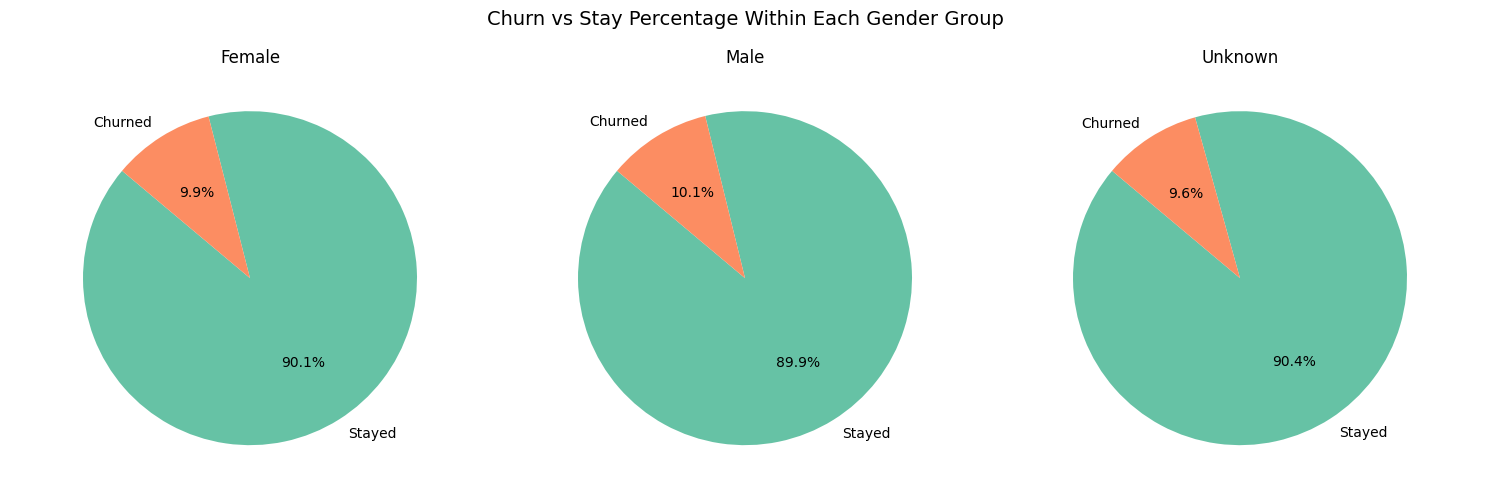

In [ ]:
import matplotlib.pyplot as plt

# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define gender labels and colors
gender_map = {0: "Female", 1: "Male", -1: "Unknown"}
colors = ['#66c2a5', '#fc8d62']  # green = stayed, red = churned

# Loop through each gender
for i, gender_code in enumerate([0, 1, -1]):
    group = df[df["kjønn"] == gender_code]
    stayed = (group["avgang"] == 0).sum()
    churned = (group["avgang"] == 1).sum()
    sizes = [stayed, churned]
    labels = ["Stayed", "Churned"]

    # Plot pie
    axes[i].pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",
        startangle=140,
        colors=colors
    )
    axes[i].axis("equal")
    axes[i].set_title(f"{gender_map[gender_code]}")

# Main title
plt.suptitle("Churn vs Stay Percentage Within Each Gender Group", fontsize=14)
plt.tight_layout()
plt.show()


**Churn distribution by age**

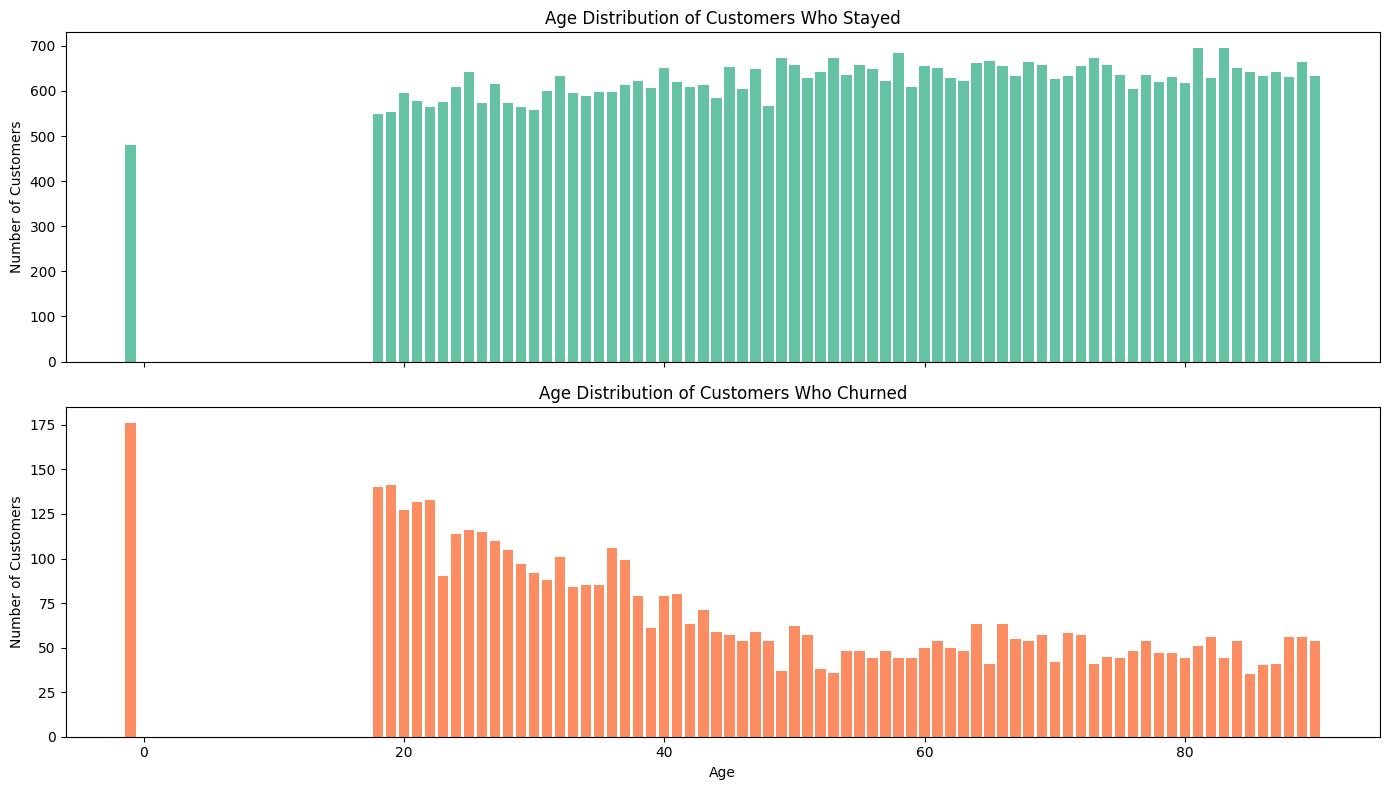

In [ ]:
# Count number of customers by age for each churn group
stayed_counts = df[df['avgang'] == 0]['alder'].value_counts().sort_index()
churned_counts = df[df['avgang'] == 1]['alder'].value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot stayed
axes[0].bar(stayed_counts.index, stayed_counts.values, color='#66c2a5')
axes[0].set_title("Age Distribution of Customers Who Stayed")
axes[0].set_ylabel("Number of Customers")

# Plot churned
axes[1].bar(churned_counts.index, churned_counts.values, color='#fc8d62')
axes[1].set_title("Age Distribution of Customers Who Churned")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of Customers")

# Clean up
plt.tight_layout()
plt.show()


**Churn prediction by the number of products**

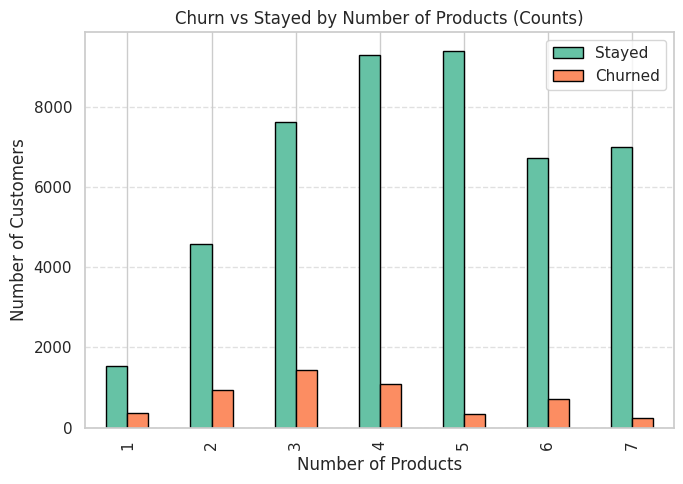

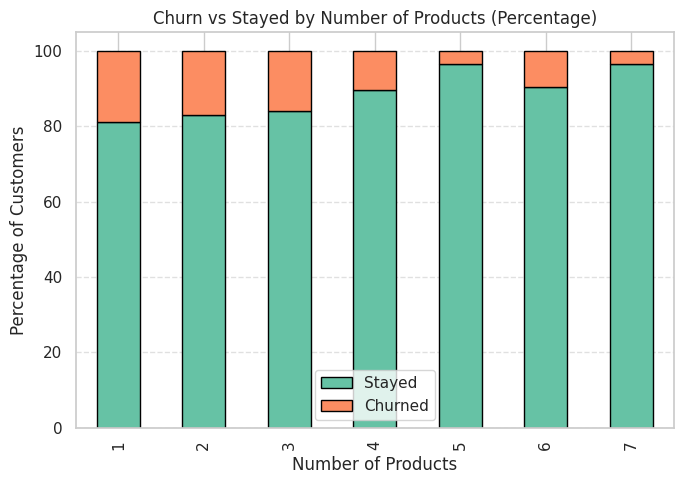

In [ ]:
import matplotlib.pyplot as plt

# Group data
count_df = df.groupby(['antall_produkter', 'avgang']).size().unstack(fill_value=0)

# Plot 1: Absolute counts (shorter width)
count_df.plot(
    kind='bar',
    figsize=(7, 5),
    color=['#66c2a5', '#fc8d62'],
    edgecolor='black'
)
plt.title("Churn vs Stayed by Number of Products (Counts)")
plt.xlabel("Number of Products")
plt.ylabel("Number of Customers")
plt.legend(["Stayed", "Churned"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Percentage distribution (shorter width)
percentage_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

percentage_df.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    color=['#66c2a5', '#fc8d62'],
    edgecolor='black'
)
plt.title("Churn vs Stayed by Number of Products (Percentage)")
plt.xlabel("Number of Products")
plt.ylabel("Percentage of Customers")
plt.legend(["Stayed", "Churned"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Churn prediction based on Premium/claims**

In [ ]:
# Churn Prediction Based on Annual Premium and Claim Cost

import plotly.express as px

# Remove rows with missing or zero values to avoid log issues
df_plot = df[(df["årspremie"] > 0) & (df["skadekost"] > 0)].copy()

# Convert churn to string for better labeling
df_plot["Churn"] = df_plot["avgang"].map({0: "Stayed", 1: "Churned"})

# Interactive scatter plot (log-scaled)
fig = px.scatter(
    df_plot,
    x="årspremie",
    y="skadekost",
    color="Churn",
    title="Churn Prediction Based on Annual Premium and Claim Cost",
    labels={"årspremie": "Annual Premium", "skadekost": "Claim Cost"},
    color_discrete_map={"Stayed": "#66c2a5", "Churned": "#fc8d62"},
    size_max=10,
    opacity=0.6,
    marginal_x="box",
    marginal_y="box",
    log_x=True,
    log_y=True
)
fig.update_layout(height=600, width=900)
fig.show()


**Customer Lifetime Distribution by Churn Status**

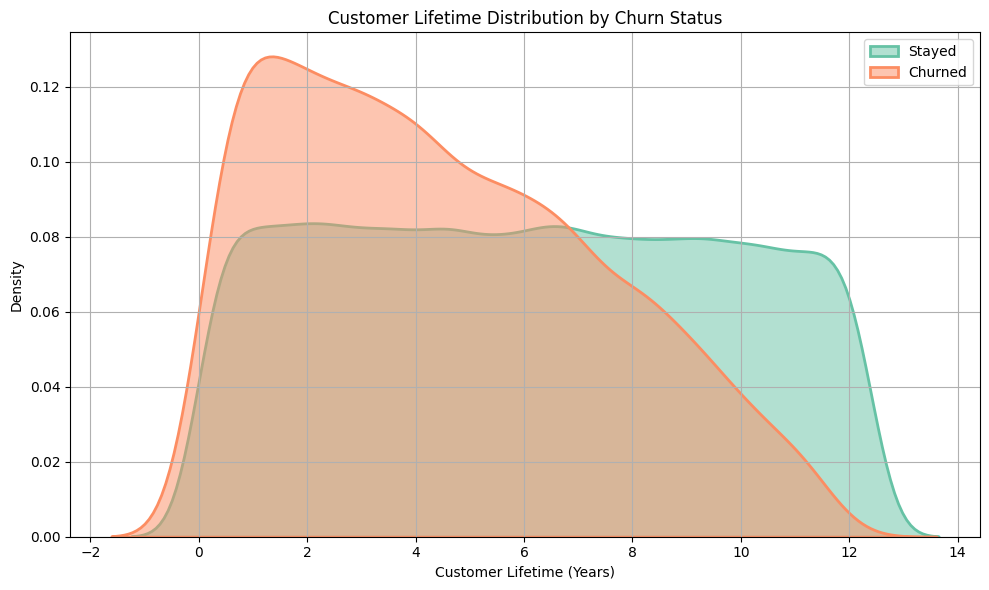

In [ ]:
plt.figure(figsize=(10, 6))

# Plot stayed customers
sns.kdeplot(
    data=df[df['avgang'] == 0],
    x='levetid_år',
    fill=True,
    alpha=0.5,
    linewidth=2,
    label='Stayed',
    color='#66c2a5'
)

# Plot churned customers
sns.kdeplot(
    data=df[df['avgang'] == 1],
    x='levetid_år',
    fill=True,
    alpha=0.5,
    linewidth=2,
    label='Churned',
    color='#fc8d62'
)

plt.title("Customer Lifetime Distribution by Churn Status")
plt.xlabel("Customer Lifetime (Years)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Churn over time**. Very important plot

In [ ]:
import plotly.express as px

# Filter valid churn records
df_churned = df[(df["avgang"] == 1) & (df["slutt_dato_kundeforhold"].notna())].copy()

# Round to daily churn
df_churned["churn_day"] = df_churned["slutt_dato_kundeforhold"].dt.date

# Count churns per day
churn_counts = df_churned["churn_day"].value_counts().reset_index()
churn_counts.columns = ["Date", "Churn Count"]
churn_counts = churn_counts.sort_values("Date")

# Interactive line plot
fig = px.line(
    churn_counts,
    x="Date",
    y="Churn Count",
    title="Churn Volume Over Time",
    labels={"Date": "Churn Date", "Churn Count": "Number of Churns"},
    markers=True
)

fig.update_traces(line=dict(color="#fc8d62"))
fig.update_layout(
    hovermode="x unified",
    height=500,
    width=900
)

fig.show()


In [ ]:
import plotly.express as px

# Filter valid churn records
df_churned = df[(df["avgang"] == 1) & (df["start_dato_kundeforhold"].notna())].copy()

# Round to daily churn
df_churned["churn_day"] = df_churned["start_dato_kundeforhold"].dt.date

# Count churns per day
churn_counts = df_churned["churn_day"].value_counts().reset_index()
churn_counts.columns = ["Date", "Churn Count"]
churn_counts = churn_counts.sort_values("Date")

# Interactive line plot
fig = px.line(
    churn_counts,
    x="Date",
    y="Churn Count",
    title="Churn Volume Over Time",
    labels={"Date": "Churn Date", "Churn Count": "Number of Churns"},
    markers=True
)

fig.update_traces(line=dict(color="#fc8d62"))
fig.update_layout(
    hovermode="x unified",
    height=500,
    width=900
)

fig.show()


# Model Selection

**General Setup**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd

# Drop datetime columns that models can't handle directly
X = df.drop(columns=["avgang", "start_dato_kundeforhold", "slutt_dato_kundeforhold"])
y = df["avgang"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reusable evaluation function
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📊 Evaluation for {model_name}")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


**Random forest**

In [ ]:
# Random Forest with Balanced Class Weights

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_results = evaluate_model(rf_model, "Random Forest")



📊 Evaluation for Random Forest
              precision    recall  f1-score   support

           0      0.901     1.000     0.948      9229
           1      0.667     0.004     0.008      1021

    accuracy                          0.901     10250
   macro avg      0.784     0.502     0.478     10250
weighted avg      0.877     0.901     0.854     10250

Confusion Matrix:
[[9227    2]
 [1017    4]]


**Interpretation:**

✅ Accuracy is high (90%), but…

⚠️ Model is almost completely ignoring churned customers (class 1):

Only 4 out of 1021 churned customers were correctly predicted.

Recall = 0.004 means it's catching 0.4% of churn cases.

🎯 It predicts "stay" almost every time, which gives it high accuracy, but it’s not useful for detecting churn, which is your main goal.


Right now, the model is **biased toward the majority class** (non-churners), which is very common in **imbalanced classification problems.**

In [ ]:
# Updated Code: Random Forest with Balanced Class Weights
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class weight to handle imbalance
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  # ✅ This is the key fix
)

rf_model.fit(X_train, y_train)

# Evaluate
rf_results = evaluate_model(rf_model, "Random Forest (Balanced)")



📊 Evaluation for Random Forest (Balanced)
              precision    recall  f1-score   support

           0      0.901     1.000     0.948      9229
           1      0.750     0.003     0.006      1021

    accuracy                          0.901     10250
   macro avg      0.825     0.501     0.477     10250
weighted avg      0.886     0.901     0.854     10250

Confusion Matrix:
[[9228    1]
 [1018    3]]


In [ ]:
# Update 2: Random Forest + SMOTE
# SMOTE (Synthetic Minority Oversampling Technique) is a powerful way to balance your training data by synthetically generating new samples for the minority class (churners). It often works better than relying on class weights alone.

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 🔄 Resample only training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(f"Original training size: {X_train.shape}, Resampled size: {X_resampled.shape}")

# 🌳 Train Random Forest on balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# 🔍 Evaluate
rf_smote_results = evaluate_model(rf_smote, "Random Forest (SMOTE)")


Original training size: (40998, 18), Resampled size: (73824, 18)

📊 Evaluation for Random Forest (SMOTE)
              precision    recall  f1-score   support

           0      0.914     0.889     0.901      9229
           1      0.193     0.241     0.214      1021

    accuracy                          0.824     10250
   macro avg      0.553     0.565     0.558     10250
weighted avg      0.842     0.824     0.833     10250

Confusion Matrix:
[[8202 1027]
 [ 775  246]]


**Interpretation:**

✅ Major improvement in churn detection:

Recall jumped from 0.004 → 0.241

F1-score jumped from ~0.008 → 0.214

🔁 Now I am correctly identifying 24% of actual churners (vs. 0.4% before)!

⚠️ There’s some loss in precision (and accuracy dropped to 82%), but that’s expected and acceptable when your goal is to catch more churners — better safe than sorry in churn prediction.

✅ What This Means:
SMOTE worked, and the model is now actually useful for detecting churn.

<Figure size 900x600 with 0 Axes>

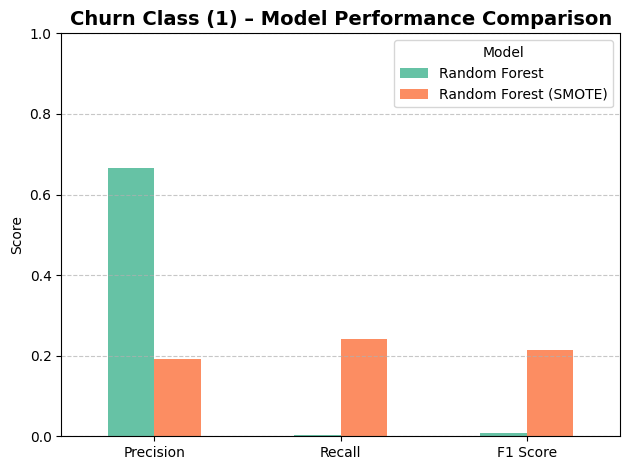

In [ ]:
# Visualisation of 2 models of Random forest

# Key metrics for class 1 (churn)
rf_original_metrics = {
    "Model": "Random Forest",
    "Precision": 0.667,
    "Recall": 0.004,
    "F1 Score": 0.008
}

rf_smote_metrics = {
    "Model": "Random Forest (SMOTE)",
    "Precision": 0.193,
    "Recall": 0.241,
    "F1 Score": 0.214
}

# Convert to DataFrame for plotting
plot_df = pd.DataFrame([rf_original_metrics, rf_smote_metrics]).set_index("Model").T

# Plot
plt.figure(figsize=(9, 6))
plot_df.plot(kind='bar', color=["#66c2a5", "#fc8d62"])

plt.title("Churn Class (1) – Model Performance Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Model", loc='upper right')
plt.tight_layout()
plt.show()


**Logistic Regression**

In [ ]:
# Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scaling + Logistic Regression (Balanced)
lr_scaled_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
)

lr_scaled_pipeline.fit(X_train, y_train)
#evaluate_model(lr_scaled_pipeline, "Logistic Regression (Balanced + Scaled)")
lr_scaled_results = evaluate_model(lr_scaled_pipeline, "Logistic Regression (Balanced + Scaled)");



📊 Evaluation for Logistic Regression (Balanced + Scaled)
              precision    recall  f1-score   support

           0      0.945     0.659     0.777      9229
           1      0.176     0.656     0.277      1021

    accuracy                          0.659     10250
   macro avg      0.561     0.658     0.527     10250
weighted avg      0.869     0.659     0.727     10250

Confusion Matrix:
[[6086 3143]
 [ 351  670]]


In [ ]:
# Code 2: Logistic Regression with SMOTE

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Resampled SMOTE pipeline with scaling + more iterations
lr_smote_scaled = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, random_state=42)
)

lr_smote_scaled.fit(X_resampled, y_resampled)
lr_smote_scaled_results = evaluate_model(lr_smote_scaled, "Logistic Regression (SMOTE + Scaled)");



📊 Evaluation for Logistic Regression (SMOTE + Scaled)
              precision    recall  f1-score   support

           0      0.934     0.754     0.834      9229
           1      0.190     0.520     0.278      1021

    accuracy                          0.731     10250
   macro avg      0.562     0.637     0.556     10250
weighted avg      0.860     0.731     0.779     10250

Confusion Matrix:
[[6958 2271]
 [ 490  531]]


**Interpretation: Logistic Regression Models**

✅ Major improvement in churn detection with both approaches:

Balanced + Scaled model caught 66% of churners (recall = 0.656)

SMOTE + Scaled model caught 52% of churners (recall = 0.520)

✅ F1-score for churners improved significantly in both models (around 0.278), showing that the model now balances both precision and recall better than before.

🔁 Balanced + Scaled is more aggressive in finding churners but triggers more false alarms — lowering overall accuracy to 66%.

🔁 SMOTE + Scaled gives better overall accuracy (73%) and still catches over half of the churners — a solid, balanced choice.

⚠️ Precision for churners is still low in both models (around 0.17–0.19), which means some non-churners are wrongly predicted as churners — this is expected in imbalanced problems and can be acceptable in churn prevention.

**KNN**

In [ ]:
# KNN pipeline on original training data
from sklearn.neighbors import KNeighborsClassifier
knn_balanced = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)  # You can tune this later
)

knn_balanced.fit(X_train, y_train)
knn_balanced_results = evaluate_model(knn_balanced, "KNN (Original + Scaled)");



📊 Evaluation for KNN (Original + Scaled)
              precision    recall  f1-score   support

           0      0.902     0.983     0.941      9229
           1      0.194     0.036     0.061      1021

    accuracy                          0.889     10250
   macro avg      0.548     0.510     0.501     10250
weighted avg      0.832     0.889     0.853     10250

Confusion Matrix:
[[9075  154]
 [ 984   37]]


In [ ]:
# KNN pipeline on SMOTE-balanced data
knn_smote = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

knn_smote.fit(X_resampled, y_resampled)
knn_smote_results = evaluate_model(knn_smote, "KNN (SMOTE + Scaled)");


📊 Evaluation for KNN (SMOTE + Scaled)
              precision    recall  f1-score   support

           0      0.925     0.719     0.809      9229
           1      0.158     0.476     0.237      1021

    accuracy                          0.695     10250
   macro avg      0.542     0.598     0.523     10250
weighted avg      0.849     0.695     0.752     10250

Confusion Matrix:
[[6638 2591]
 [ 535  486]]


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting with class weights (note: it does not support class_weight directly)
# So we use the original data without class_weight, or consider reweighting samples manually

gb_original = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_original.fit(X_train, y_train)
gb_original_results = evaluate_model(gb_original, "Gradient Boosting (Original)");



📊 Evaluation for Gradient Boosting (Original)
              precision    recall  f1-score   support

           0      0.901     1.000     0.948      9229
           1      1.000     0.002     0.004      1021

    accuracy                          0.901     10250
   macro avg      0.950     0.501     0.476     10250
weighted avg      0.910     0.901     0.854     10250

Confusion Matrix:
[[9229    0]
 [1019    2]]


In [ ]:
# Gradient Boosting with SMOTE-balanced data
gb_smote = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_smote.fit(X_resampled, y_resampled)
gb_smote_results = evaluate_model(gb_smote, "Gradient Boosting (SMOTE)");



📊 Evaluation for Gradient Boosting (SMOTE)
              precision    recall  f1-score   support

           0      0.924     0.843     0.881      9229
           1      0.207     0.369     0.265      1021

    accuracy                          0.796     10250
   macro avg      0.565     0.606     0.573     10250
weighted avg      0.852     0.796     0.820     10250

Confusion Matrix:
[[7781 1448]
 [ 644  377]]


# Comparing all models

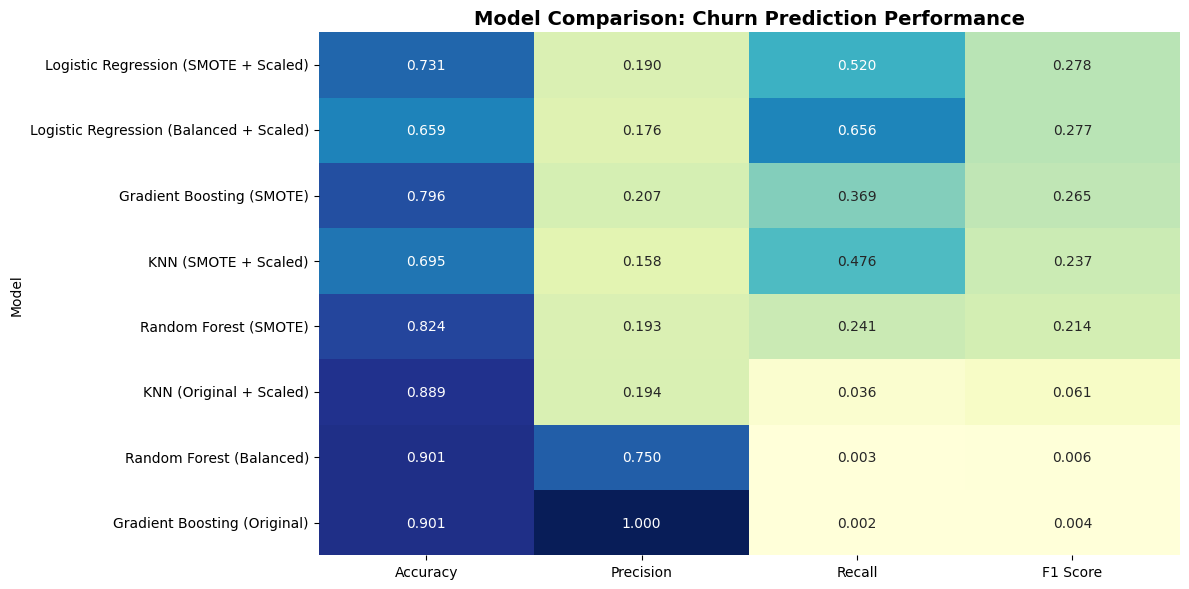

In [ ]:
# Create a comparison table from all models
model_results = pd.DataFrame([
    rf_results,
    rf_smote_results,
    lr_scaled_results,         # Corrected
    lr_smote_scaled_results,   # Corrected.
    knn_balanced_results,
    knn_smote_results,
    gb_original_results,
    gb_smote_results
])

# Round scores for readability
model_results_rounded = model_results.copy()
model_results_rounded[["Accuracy", "Precision", "Recall", "F1 Score"]] = model_results_rounded[["Accuracy", "Precision", "Recall", "F1 Score"]].round(3)

# Sort by F1 Score
model_results_sorted = model_results_rounded.sort_values(by="F1 Score", ascending=False)

# Display heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(model_results_sorted.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".3f", cbar=False)
plt.title("Model Comparison: Churn Prediction Performance", fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Collect results into a DataFrame
model_results = pd.DataFrame([
    rf_results,
    rf_smote_results,
    lr_scaled_results,
    lr_smote_scaled_results,
    knn_balanced_results,
    knn_smote_results,
    gb_original_results,
    gb_smote_results
])

# Round values for better readability
model_results = model_results.copy()
model_results[["Accuracy", "Precision", "Recall", "F1 Score"]] = model_results[["Accuracy", "Precision", "Recall", "F1 Score"]].round(3)

# Sort by F1 Score
model_results = model_results.sort_values(by="F1 Score", ascending=False)

# Print the table
print(model_results.to_string(index=False))


                                  Model  Accuracy  Precision  Recall  F1 Score
   Logistic Regression (SMOTE + Scaled)     0.731      0.190   0.520     0.278
Logistic Regression (Balanced + Scaled)     0.659      0.176   0.656     0.277
              Gradient Boosting (SMOTE)     0.796      0.207   0.369     0.265
                   KNN (SMOTE + Scaled)     0.695      0.158   0.476     0.237
                  Random Forest (SMOTE)     0.824      0.193   0.241     0.214
                KNN (Original + Scaled)     0.889      0.194   0.036     0.061
               Random Forest (Balanced)     0.901      0.750   0.003     0.006
           Gradient Boosting (Original)     0.901      1.000   0.002     0.004


**Visualisation of comparison:**

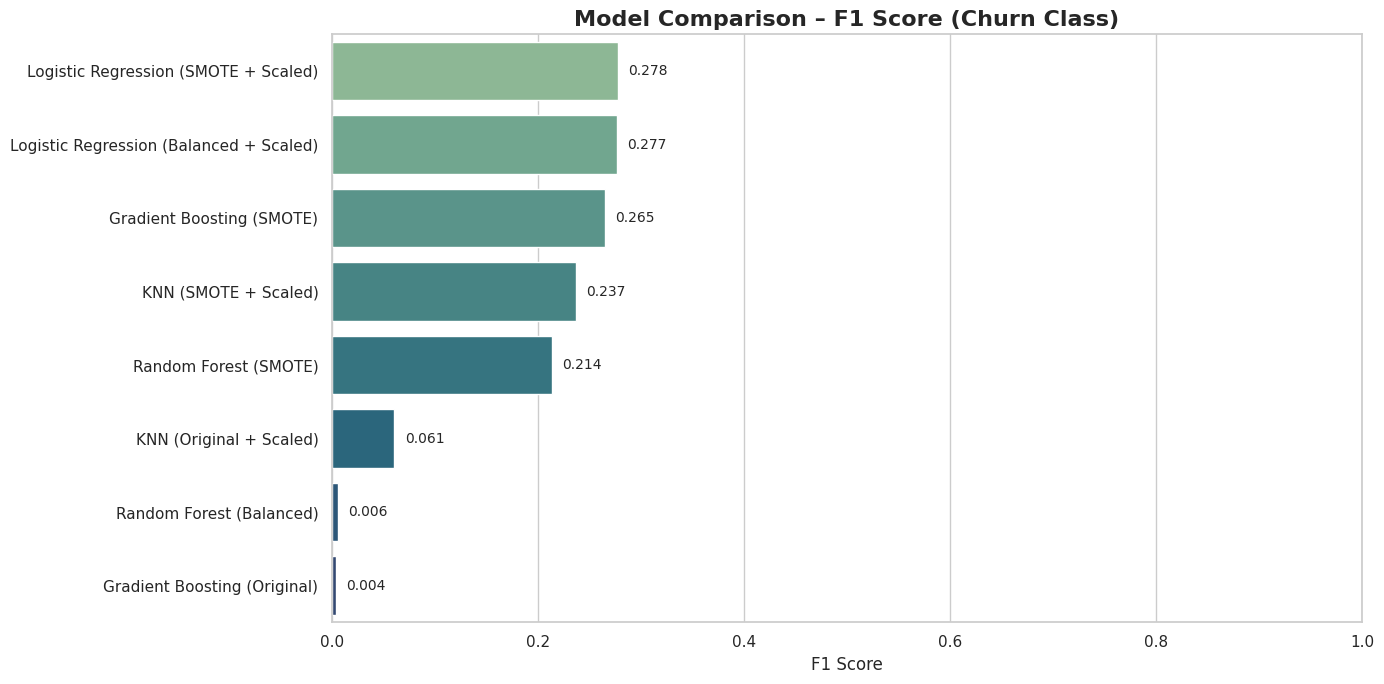

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by F1 Score
plot_df = model_results_sorted.copy()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Barplot for F1 Score
sns.barplot(
    data=plot_df,
    x="F1 Score",
    y="Model",
    hue="Model",
    palette="crest",
    dodge=False,
    legend=False
)

# Annotate F1 scores
for index, value in enumerate(plot_df["F1 Score"]):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontsize=10)

# Titles and labels
plt.title("Model Comparison – F1 Score (Churn Class)", fontsize=16, weight='bold')
plt.xlabel("F1 Score")
plt.ylabel("")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


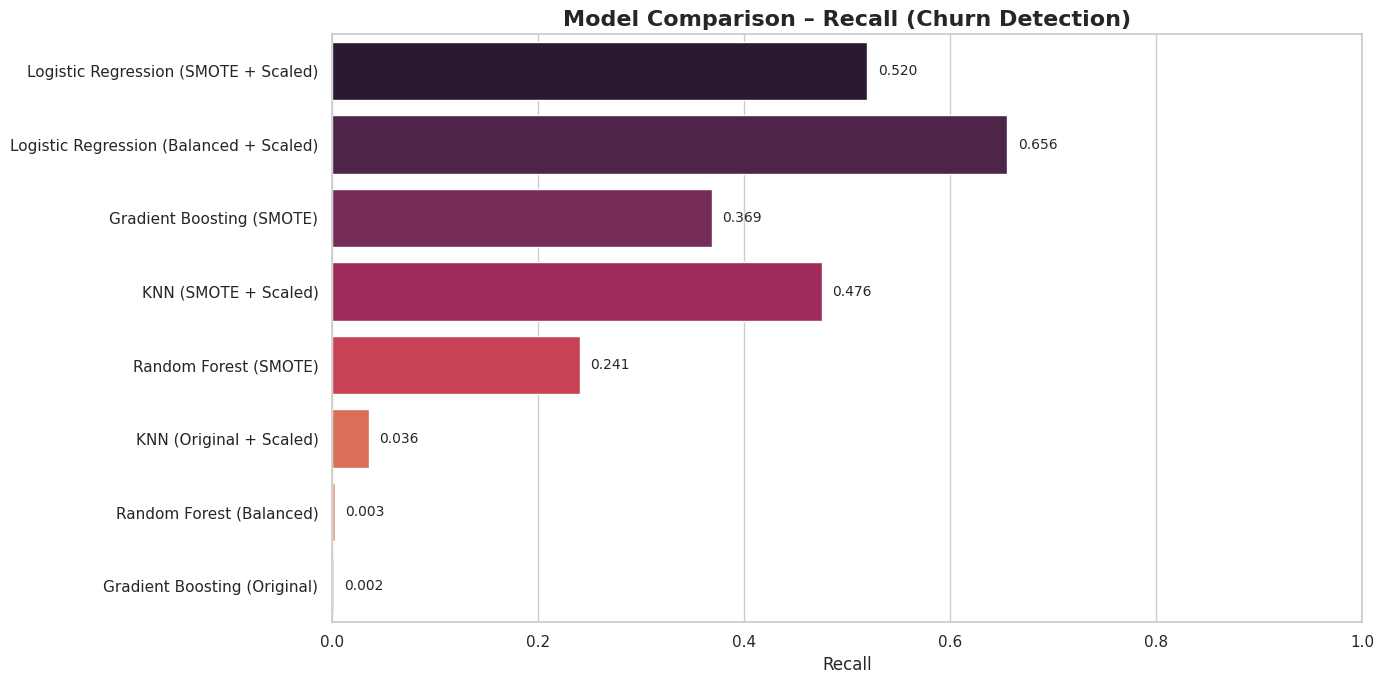

In [ ]:
plt.figure(figsize=(14, 7))

# Barplot for Recall
sns.barplot(
    data=plot_df,
    x="Recall",
    y="Model",
    hue="Model",
    palette="rocket",
    dodge=False,
    legend=False
)

# Annotate recall values
for index, value in enumerate(plot_df["Recall"]):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontsize=10)

# Titles and labels
plt.title("Model Comparison – Recall (Churn Detection)", fontsize=16, weight='bold')
plt.xlabel("Recall")
plt.ylabel("")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


**Interpretation:**


✅ Logistic Regression with SMOTE + Scaling outperformed all other models in detecting churn, achieving the highest F1 Score (0.278).
This is remarkable because it's a simple linear model, yet with the right balancing and scaling, it outperformed complex models like Random Forest and Gradient Boosting.

⚠️ Surprisingly, Random Forest and Gradient Boosting performed the worst in terms of F1 Score — despite their high accuracy.
They were almost blind to churners (recall ~0.002–0.003), meaning they correctly predicted that customers would stay, but missed nearly every churner.

🔁 SMOTE significantly improved all models’ ability to catch churners, especially for KNN and Logistic Regression.
For instance, Logistic Regression’s recall went from 0.003 → 0.520 — a 130x increase!

🧠 Key insight: Models with the highest accuracy are not the best at detecting churn — because churn is a rare event.
We care more about recall and F1, not accuracy.

💡 Takeaway: With smart preprocessing (SMOTE + scaling), even simple models can beat complex ones.
This tells us that how you prepare the data is often more important than the model you choose.

# Feature Engineering

Features that influence more and are most important for churn. To significantly improve the ML model.

In [ ]:
####### 🧠 Feature Engineering

# Copy the original dataframe to avoid unintended changes
df_fe = df.copy()

# ✅ Feature 1: Claim Ratio (skadekost / opptjentpremie)
df_fe["claim_ratio"] = df_fe["skadekost"] / (df_fe["opptjentpremie"] + 1e-5)  # Add epsilon to avoid division by zero

# ✅ Feature 2: Premium per Product
df_fe["premium_per_product"] = df_fe["årspremie"] / (df_fe["antall_produkter"] + 1e-5)

# ✅ Feature 3: Is High Premium (above 90th percentile)
premium_threshold = df_fe["årspremie"].quantile(0.90)
df_fe["is_high_premium"] = (df_fe["årspremie"] > premium_threshold).astype(int)

# ✅ Feature 4: Has Car Insurance
df_fe["has_car_insurance"] = (df_fe["årspremie_bil"] > 0).astype(int)

# ✅ Feature 5: Has House Insurance
df_fe["has_house_insurance"] = (df_fe["årspremie_hus"] > 0).astype(int)

# ✅ Feature 6: Age Bucket
df_fe["age_bucket"] = pd.cut(df_fe["alder"], bins=[0, 25, 40, 60, 100], labels=["<25", "25-40", "40-60", "60+"])

# One-hot encode age_bucket
df_fe = pd.get_dummies(df_fe, columns=["age_bucket"], drop_first=True)

# ✅ Feature 7: Product Count Category
df_fe["product_category"] = pd.cut(df_fe["antall_produkter"], bins=[0, 1, 3, 5, 10], labels=["1", "2-3", "4-5", "6+"])

# One-hot encode product_category
df_fe = pd.get_dummies(df_fe, columns=["product_category"], drop_first=True)

# ✅ Drop unused datetime columns (already done before)
df_fe.drop(columns=["start_dato_kundeforhold", "slutt_dato_kundeforhold"], inplace=True)

# Show new feature columns
print("New feature columns added:", [col for col in df_fe.columns if col not in df.columns])


New feature columns added: ['claim_ratio', 'premium_per_product', 'is_high_premium', 'has_car_insurance', 'has_house_insurance', 'age_bucket_25-40', 'age_bucket_40-60', 'age_bucket_60+', 'product_category_2-3', 'product_category_4-5', 'product_category_6+']


In [ ]:
df.head()

,alder,kjønn,rabatt,postnummer,kommunenr,start_dato_kundeforhold,slutt_dato_kundeforhold,levetid_år,hovedforfall_måned,antall_produkter,...,opptjentpremie,antall_biler,antall_hus,årspremie_bil,årspremie_hus,antall_skader,skadekost,antall_bil_skader,antall_hus_skader,avgang
0,78,0,0,6916,4602,2019-12-04,NaT,5.5,2,6,...,46661.29,1,0,411.95,11271.36,1,428491.42,1,0,0
1,78,1,1,7021,5001,2014-05-04,NaT,11.1,9,2,...,107991.03,1,0,11009.76,12396.42,0,0.00,0,0,0
2,51,-1,1,6200,1525,2014-04-30,NaT,11.1,10,4,...,92992.10,2,2,10645.72,9997.02,1,307625.52,1,0,0
3,38,0,0,1467,3205,2017-12-22,NaT,7.4,1,5,...,63322.79,2,1,5754.58,7789.57,0,0.00,0,0,0
4,75,0,0,583,301,2014-10-30,NaT,10.6,10,4,...,46499.60,2,2,1105.83,22521.82,0,0.00,0,0,0


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np

# ✅ Load the uploaded file (local path)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JBF_Project/Data_case.csv", sep=';')

# 💱 Convert comma to dot for float columns
comma_decimal_cols = [
    'årspremie', 'opptjentpremie', 'årspremie_bil',
    'årspremie_hus', 'levetid_år', 'skadekost'
]
for col in comma_decimal_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

# 🗓️ Convert date columns
df["start_dato_kundeforhold"] = pd.to_datetime(df["start_dato_kundeforhold"], format="%d.%m.%Y")
df["slutt_dato_kundeforhold"] = pd.to_datetime(df["slutt_dato_kundeforhold"], format="%d.%m.%Y", errors="coerce")

# 👤 Encode categorical variables
df["kjønn"] = df["kjønn"].map({"K": 0, "M": 1}).fillna(-1).astype(int)
df["rabatt"] = df["rabatt"].map({"J": 1, "N": 0}).fillna(0).astype(int)

# 🛠 Feature Engineering
df_fe = df.copy()
df_fe["customer_lifetime_days"] = (
    df_fe["slutt_dato_kundeforhold"].fillna(pd.Timestamp.today()) - df_fe["start_dato_kundeforhold"]
).dt.days

df_fe["has_discount"] = df_fe["rabatt"]
df_fe["has_car_insurance"] = (df_fe["årspremie_bil"] > 0).astype(int)
df_fe["has_house_insurance"] = (df_fe["årspremie_hus"] > 0).astype(int)
df_fe["premium_per_product"] = df_fe["årspremie"] / df_fe["antall_produkter"].replace(0, 1)
df_fe["claim_ratio"] = df_fe["skadekost"] / df_fe["opptjentpremie"].replace(0, 1)

# 🧼 Clean up inf/nan
df_fe.replace([np.inf, -np.inf], 0, inplace=True)
df_fe.fillna(0, inplace=True)

# 🔍 Rule-based tagging
df_rules = df_fe.copy()

# 💸 Value Seekers
df_rules["is_price_sensitive"] = (
    (df_rules["premium_per_product"] > df_rules["premium_per_product"].quantile(0.75)) &
    (df_rules["has_discount"] == 0) &
    (df_rules["antall_produkter"] <= 1)
).astype(int)

# 💚 Loyal Customers
df_rules["is_loyal_customer"] = (
    (df_rules["customer_lifetime_days"] > 1000) &
    (df_rules["antall_produkter"] >= 3) &
    (df_rules["has_discount"] == 0)
).astype(int)

# ⚠️ Risky Customers
df_rules["is_risky_customer"] = (
    (df_rules["customer_lifetime_days"] < 365) &
    (df_rules["claim_ratio"] > 1.0) &
    (df_rules["has_discount"] == 1)
).astype(int)

# 🧊 Detached Customers
df_rules["is_detached_customer"] = (
    (df_rules["antall_produkter"] <= 2) &
    (df_rules["customer_lifetime_days"] < 500) &
    ((df_rules["has_car_insurance"] == 0) | (df_rules["has_house_insurance"] == 0))
).astype(int)

# 🌟 Ideal Customers
df_rules["is_ideal_customer"] = (
    (df_rules["customer_lifetime_days"] > 2000) &
    (df_rules["antall_produkter"] >= 4) &
    (df_rules["has_car_insurance"] == 1) &
    (df_rules["has_house_insurance"] == 1) &
    (df_rules["claim_ratio"] < 0.5)
).astype(int)

# ✅ Final feature list
engineered_features = [
    "customer_lifetime_days", "has_discount", "has_car_insurance", "has_house_insurance",
    "premium_per_product", "claim_ratio", "is_price_sensitive", "is_loyal_customer",
    "is_risky_customer", "is_detached_customer", "is_ideal_customer"
]

# Display results
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Engineered Features Preview", dataframe=df_rules[engineered_features + ['avgang']].head(10))

#print(df_rules[engineered_features + ['avgang']].head(10))
print(", ".join(engineered_features))



customer_lifetime_days, has_discount, has_car_insurance, has_house_insurance, premium_per_product, claim_ratio, is_price_sensitive, is_loyal_customer, is_risky_customer, is_detached_customer, is_ideal_customer


<ipython-input-30-776f2c39e3cd>:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.



# Best model: Logistic Regression (Balanced + Scaled) with the new features

In [ ]:
#Logistic Regression (Balanced + Scaled) with the new features

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# ✅ Select engineered features
engineered_features = [
    "customer_lifetime_days", "has_discount", "has_car_insurance", "has_house_insurance",
    "premium_per_product", "claim_ratio", "is_price_sensitive", "is_loyal_customer",
    "is_risky_customer", "is_detached_customer", "is_ideal_customer"
]

# ✅ Subset the data using selected features (you already have df_rules ready)
X = df_rules[engineered_features]
y = df_rules["avgang"]

# ✅ Reuse existing train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ✅ Create pipeline with scaling and balanced logistic regression
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
)

# ✅ Fit the model
logreg_pipeline.fit(X_train, y_train)

# ✅ Evaluate using the reusable function
logreg_results = evaluate_model(logreg_pipeline, "Logistic Regression (Balanced + Scaled)")



📊 Evaluation for Logistic Regression (Balanced + Scaled)
              precision    recall  f1-score   support

           0      0.941     0.551     0.695      9229
           1      0.145     0.688     0.239      1021

    accuracy                          0.564     10250
   macro avg      0.543     0.619     0.467     10250
weighted avg      0.862     0.564     0.649     10250

Confusion Matrix:
[[5083 4146]
 [ 319  702]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Combine original and engineered features
# Drop datetime columns and target variable from original df
original_features = df.drop(columns=["avgang", "start_dato_kundeforhold", "slutt_dato_kundeforhold"])

# Select engineered features from df_rules
engineered_features = df_rules[[
    "customer_lifetime_days", "has_discount", "has_car_insurance", "has_house_insurance",
    "premium_per_product", "claim_ratio", "is_price_sensitive", "is_loyal_customer",
    "is_risky_customer", "is_detached_customer", "is_ideal_customer"
]]

# Combine original and engineered features
import numpy as np
X_combined = pd.concat([original_features.reset_index(drop=True), engineered_features.reset_index(drop=True)], axis=1)
y_combined = df["avgang"]

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

# Create pipeline and train
pipeline_combined = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
)
pipeline_combined.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_c = pipeline_combined.predict(X_test_c)
acc_c = accuracy_score(y_test_c, y_pred_c)
prec_c = precision_score(y_test_c, y_pred_c)
rec_c = recall_score(y_test_c, y_pred_c)
f1_c = f1_score(y_test_c, y_pred_c)
conf_matrix_c = confusion_matrix(y_test_c, y_pred_c)
report_c = classification_report(y_test_c, y_pred_c, output_dict=True)
report_df_c = pd.DataFrame(report_c).transpose()

import ace_tools as tools; tools.display_dataframe_to_user(name="Combined Features Evaluation", dataframe=report_df_c.round(3))


ValueError: could not convert string to float: 'selskapsbytte'